# Project: TMDB movies analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000+ movies collected from The Movie Database(TMDb), including user ratings and revenue.
> certain columns contain multiple values seperated by pipe(`|`) characters, some names in the cast and director columns contain odd characters and the final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars accounting for inflation over the years.

### Dependent variables in this analysis
<ul>
    <li>Revenue</li>
    <li>Budget</li>
</ul>

### Independent variables helpful to the analysis
<ul>
    <li>Original Title</li>
    <li>Popularity</li>
    <li>Cast</li>
    <li>Director</li>
    <li>Runtime</li>
    <li>Genres</li>
    <li>Production Companies</li>
    <li>Release Date</li>
    <li>Vote Average</li>
    <li>Release Year</li>
</ul>

### Questions to explore during analysis
<ul>
    <li>Which genres are popular year to year?</li>
    <li>Which genres of movies are associated with longer runtimes?</li>
    <li>How did revenue made from movies change over the years?</li>
    <li>How did the budget of making movies change over the years?</li>
    <li>Which properties are associated with high revenues?</li>
    <li>Are high budget movies more popular than low budget movies?</li>
    <li>Which actors starred in most movies over the years?</li>
    <li>Which directors directed most movies over the years?</li>
    <li>Which production companies produced the most movies over the years?</li>
    <li>Did the number of movies released every year increase or decrease during the years?</li>
    <li>In what month are movies mostly released over the years?</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> The code cells to follow contain code that shows general properties of the data set using pandas functions.

#### Shape of the data

The dataset has `10866 columns` and `21 rows`

#### More information about individual columns

1. The columns are indexed 0-20 and the rows are indexed 0-10865.
2. With a quick glance we can see that some of the columns contain missing data.
3. The `release_date` column values are of the wrong data type, the values in this column are `object` elements instead of `datetime` elements.
4. The data set contain columns that are not relevant to the analysis so we will have to drop those columns in the cleaning process.
5. The `cast` and `production_companies` column contain multiple values seperated by a pipe(|) character, so we will have solve this problem without compromising the integrity of the data.

#### Missing values

1. `imdb` column has 10 null values
2. `cast` column has 76 null values
3. `homepage` column has 7930 null values
4. `director` column has 7930 null values
5. `tagline` column has 7930 null values
6. `keywords` column has 7930 null values
7. `overview` column has 7930 null values
8. `genres` column has 7930 null values
9. `production_companies` column has 7930 null values

#### Duplicates

Row `2090` has a duplicate so I will be dropping one of the rows.

In [2]:
# Load and view data
df = pd.read_csv('../../datasets/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Number of rows and columns
df.shape

(10866, 21)

In [4]:
# More info about the dataset rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Total number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Checking to see if there are any duplicated rows
df.duplicated().sum()

1

In [7]:
# Checking to see which row is duplicated
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
# Summary statistics of relevant numerical columns
df.drop(columns=['id', 'release_year']).describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Cleaning and Reshaping
> The code cells to follow contain code to clean and augment the data so it is relevant for our dependent, independent variables and research questions listed in the <a href="#intro">Introduction</a> section.

#### Cleaning  process
   1. Drop columns that are not relevant to the analysis.
   2. Use pandas null values handling functions to deal with null values in the dataset i.e dropping rows with null values or imputing the null values with relevant metrics.
   3. Ensuring that multiple values seperated by `|` are handled properly without losing the intergrity of the data.
   
#### Relevance of values to the analysis

1. Both `id`, `imdb_id`, `original title`,`homepage`, `tagline`, `keywords` and `overview` columns are not relevant to our analysis.
2. I decided to use the The final two columns ending with `_adj` that show the budget and revenue of the associated movie in terms of 2010 dollars with values rounded to 2 decimal places, as that is a more precise indication of the budget and revenue necessary for revenue and budget research questions.
3. I decided to use the `vote_average` column instead of the `vote_count` column for the movie rating.


#### Values Datatypes

Change the `release_date` column values' datatype from `object` to `datetime` type. 

#### Data Augmentation

I will be augmenting the data to suit a specific research question without changing the original clean data set.

### The wrangle function below fixes the problems with the data mentioned above.

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
def wrangle(dataframe):
    # Drop columns irrelevant for the research questions
    dataframe.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], inplace=True)
    
    # Drop columns with similar information to others more relevant to the research
    dataframe.drop(columns=['revenue_adj', 'budget_adj', 'vote_count'], inplace=True)
    
    # Fixing the release date column datatype
    dataframe['release_date'] = pd.to_datetime(dataframe['release_date'])
    
    # dropping duplicates
    df.drop_duplicates(inplace=True)
   
    return dataframe

In [10]:
# Using the wrangle function from above to clean the data
df = wrangle(df)
df.head(2) # Viewing the dataframe to see if the wrangle function performed as it is supposed to. 

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


## Observations after cleaning

1. The `wrangle` function removed all columns not relevant to the analysis process.
2. We now have null values in the `cast`, `director`, `genres`, `production_companies`, this is not a problem because these values are not numerical and can not compromise the integrity of the dataset. 

In [11]:
# Checking the dataset info again to see if there are issues to be addressed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.1+ M

In [12]:
# checking how many null values I still have in the dataset
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

In [13]:
# Checking to see if there are any duplicated rows
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

> In the code cells to follow I will be using the clean data to explore and answer the research questions listed in the <a href="#intro">Introduction</a> section.

### Which genres are most popular year to year?

In [14]:
# Making a copy of the clean dataset to avoid compromising the original dataset
df_genres = df.copy()
df_genres.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [15]:
# Transforming the genres values into lists to use in the pandas explode method
df_genres['genres'] = df_genres.genres.str.split('|')

df_genres.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


In [16]:
# Making extra rows with all genres as individual values while preserving the integrity of the data
df_genres = df_genres.explode('genres')

In [17]:
# Creating a mask with columns relevant to research question 1
mask_genres = ['popularity', 'runtime','genres', 'release_year']

In [18]:
# Creating a genres dataset with columns relevant to research question 1
df_genres_mask = df_genres[mask_genres]
df_genres_mask.head(2)

,popularity,runtime,genres,release_year
0,32.985763,124,Action,2015
0,32.985763,124,Adventure,2015


In [19]:
# Computing the popularity mean of movies grouped by genre and release year and transforming the resulting 
#  Series into a pandas dataframe
df_genres_year = df_genres.groupby(['genres', 'release_year']).popularity.mean().to_frame()
df_genres_year.head(2)

popularity
genres release_year            
Action 1960            0.590724
       1961            0.365913

In [20]:
# Creating a genres dataframe by Accessing the rows that contain only 
# the largest popularity value grouped by the release year index
# and transforming the resulting series into a pandas dataframe
df_genres_ = df_genres_year.groupby(level='release_year').popularity.nlargest(1).to_frame()

In [21]:
# Turning the second(genres) into a column
df_genres_.reset_index(level=1, inplace=True)

In [22]:
df_genres_.head()

,,genres,popularity
release_year,release_year,,
1960,1960,Thriller,0.811910
1961,1961,Animation,2.631987
1962,1962,Adventure,0.942513
1963,1963,Animation,2.180410
1964,1964,War,0.930959


In [23]:
df_genres_.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1960) to (2015, 2015)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      56 non-null     object 
 1   popularity  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [24]:
def bar(data, size=(10, 6)):
    locations = np.arange(0, len(data), 1)
    heights = data
    plt.figure(figsize=size)
    plt.barh(locations, heights, tick_label=data.index)

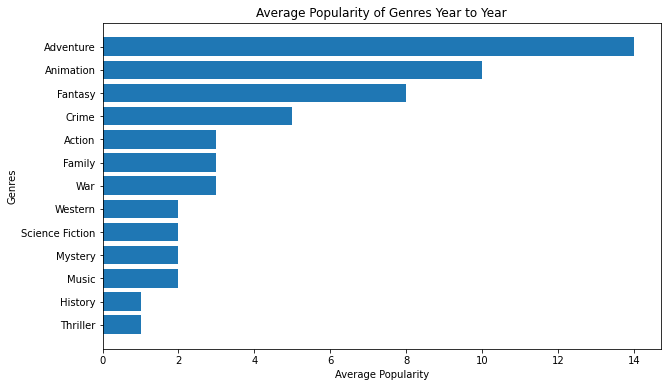

In [25]:
# Bar plot of the resulting transformed data
genres_data = df_genres_.genres.value_counts().sort_values()
bar(genres_data)
plt.xlabel('Average Popularity')
plt.ylabel('Genres')
plt.title('Average Popularity of Genres Year to Year');

#### Observations

The `Adventure` genre has been the most popular genre over the years, followed by `Animation` and `Fantasy`.

### Which genres of movies are associated with longer runtimes?

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_genres_mask.head()

,popularity,runtime,genres,release_year
0,32.985763,124,Action,2015
0,32.985763,124,Adventure,2015
0,32.985763,124,Science Fiction,2015
0,32.985763,124,Thriller,2015
1,28.419936,120,Action,2015


In [27]:
# Getting the average runtime of each genre
df_genres_runtime = df_genres_mask.groupby('genres').runtime.mean().sort_values()

In [28]:
df_genres_runtime.index

Index(['Animation', 'Family', 'TV Movie', 'Horror', 'Comedy',
       'Science Fiction', 'Fantasy', 'Documentary', 'Thriller', 'Action',
       'Music', 'Mystery', 'Adventure', 'Romance', 'Crime', 'Foreign', 'Drama',
       'Western', 'War', 'History'],
      dtype='object', name='genres')

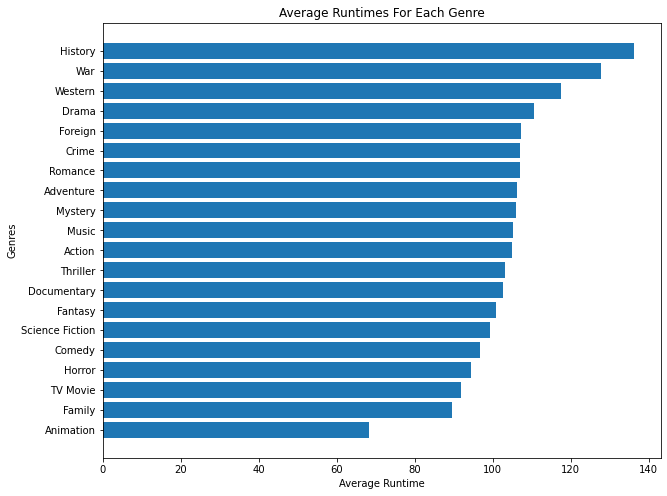

In [29]:
# Bar plot of the genre average runtimes
bar(df_genres_runtime, (10, 8));
plt.xlabel('Average Runtime')
plt.ylabel('Genres')
plt.title('Average Runtimes For Each Genre');

#### Observations

The `History` genre is seen to mostly have the longest runtimes, followed by `War`, `Western` and `Drama`.

### How did revenue made from movies change over the years?

In [30]:
# Getting movies that made a revenue of above 0
# extracting those movies from the original dataframe into their own dataframe using a mask
mask_rev = df.revenue > 0
df_rev = df[mask_rev]

In [31]:
sns.set_style?

In [32]:
# Matplotlib.pyplot line plot function
def plot(data):
    plt.figure(figsize=(8, 5))
    sns.set_style(style='darkgrid')
    plt.plot(data)

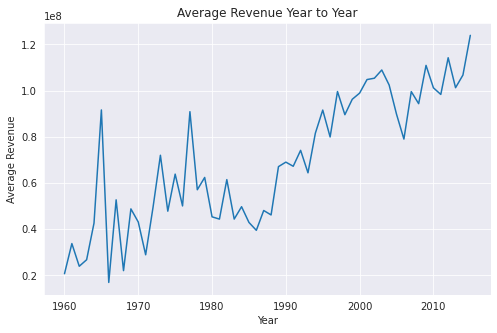

In [33]:
# Plotting the trend in the average revenue made from movies in the dataset over the years
df_rev_plot = df_rev.groupby('release_year').revenue.mean()
plot(df_rev_plot)
plt.title('Average Revenue Year to Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue');

### How did the budget of making movies change over the years?

In [34]:
# Getting movies that were made on a budget of above 0 dollars since it is logically impossible to not
#    on making any movie
# Extracting those movies from the original dataset into their own dataset
mask_budget = df.budget > 0
df_budget = df[mask_budget]

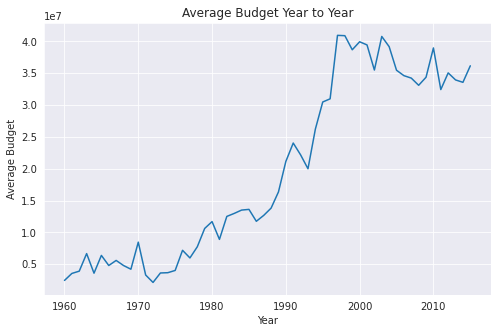

In [35]:
# Plotting the trend in the average budget that goes into making movies over the years
df_budget_plot = df_budget.groupby('release_year').budget.mean()
plot(df_budget_plot)
plt.title('Average Budget Year to Year')
plt.xlabel('Year')
plt.ylabel('Average Budget');

###  Which properties are associated with high revenues?

In [54]:
def quantiles(data):
    stats = data.describe().to_frame()['min':'max']
    col = stats.columns[0]
    bin_edges = [i for i in stats[col]]
    bin_names = ['Low', 'Medium', 'Moderately High', 'High']
    df[f'{col}_quantile'] = pd.cut(df[col], bin_edges, labels=bin_names)

In [37]:
df_rev.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015


In [55]:
# Creating levels of revenue generated from movies over the years and dividing my dataset into these levels 
#  for later exploration
quantiles(df_rev.revenue)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,revenue_quantiles,budget_quantiles,revenue_quantile
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,High,High,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,High,High,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,High,High,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,High,High,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,High,High,High


In [40]:
# Getting movies categorised under high revenue gerenation and a budget of above 0 dollars
# Extracting those movies from the revenue dataframe into their own dataframe for futhter exploration
df_high_revenue = df.query('revenue_quantiles == "High"')
df_high_revenue = df_high_revenue.query('budget > 0')
df_high_revenue = df_high_revenue.query(f'revenue > {df_high_revenue.revenue.mean()}')
stats_revenue = df_high_revenue.drop(columns=['release_year']).describe()
stats_revenue

,popularity,budget,revenue,runtime,vote_average
count,381.000000,3.810000e+02,3.810000e+02,381.000000,381.000000
mean,3.356662,1.102917e+08,5.262188e+08,120.165354,6.622835
std,3.194001,6.383028e+07,2.858027e+08,23.077591,0.698215
min,0.131526,5.000000e+06,2.819298e+08,81.000000,4.700000
25%,1.622536,6.000000e+07,3.404877e+08,101.000000,6.100000
50%,2.578731,1.050000e+08,4.242088e+08,119.000000,6.600000
75%,3.990452,1.500000e+08,6.240268e+08,135.000000,7.200000
max,32.985763,3.800000e+08,2.781506e+09,201.000000,8.100000


In [41]:
# Splitting the cast column values and exploding the column to get every cast member into their own row
#   for futher analysis
df_high_revenue['cast'] = df_high_revenue.cast.str.split('|').explode('cast')

In [42]:
# splitting the genres and production companies to get every genre and production company own rows
#    for futher analysis
df_high_revenue['genres'] = df_high_revenue.genres.str.split('|').explode('genres')
df_high_revenue['production_companies'] = (df_high_revenue
                                           .production_companies
                                           .str.split('|')
                                           .explode('production_companies'))

In [43]:
# Getting the max count of how many times an actor was in a movie that generated high revenue
df_high_revenue.cast.value_counts().max()

1

In [44]:
# Getting the genres of movies that generated high revenues over the years
df_high_revenue_genre_plot = df_high_revenue.genres.value_counts().sort_values()

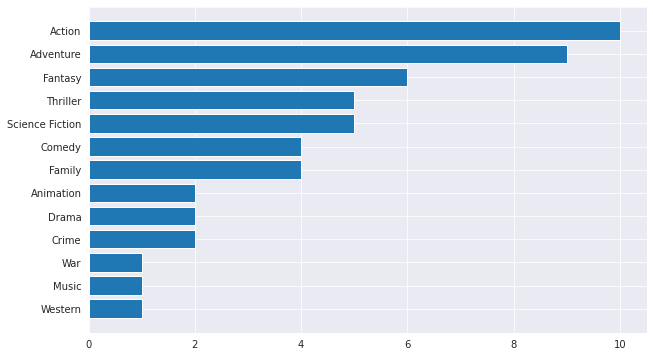

In [45]:
bar(df_high_revenue_genre_plot);

In [46]:
# Exploding the director column to check so each director gets their own row for 
#   for futher analysis
df_high_revenue['director'] = df_high_revenue.director.str.split('|').explode('director')

In [47]:
# Getting the maximun count of how much a director directed a movie that generated high revenue
df_high_revenue.director.value_counts().max()

1

In [48]:
# Extracting the month name from the release_date column into a new column called release_month
#   for futher analysis
df_high_revenue['release_month'] = df_high_revenue['release_date'].dt.month_name()
df_high_revenue.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,revenue_quantiles,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,6.5,2015,High,June
1,28.419936,150000000,378436354,Mad Max: Fury Road,Bryce Dallas Howard,George Miller,120,Adventure,Amblin Entertainment,2015-05-13,7.1,2015,High,May
2,13.112507,110000000,295238201,Insurgent,Irrfan Khan,Robert Schwentke,119,Science Fiction,Legendary Pictures,2015-03-18,6.3,2015,High,March
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Vincent D'Onofrio,J.J. Abrams,136,Thriller,Fuji Television Network,2015-12-15,7.5,2015,High,December
4,9.335014,190000000,1506249360,Furious 7,Nick Robinson,James Wan,137,Action,Dentsu,2015-04-01,7.3,2015,High,April


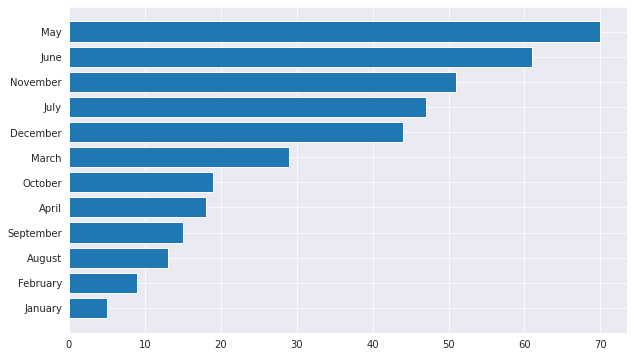

In [49]:
# Grouping movies in the high revenue dataframe by their release month and getting how many of those movies
#   were released in what month to compare
df_month = df_high_revenue.groupby('release_month').release_month.count().sort_values()
bar(df_month);

### Are high budget movies more popular than low budget movies?

In [ ]:
df.columns

In [56]:
# Dividing the dataset into budget level quantiles
quantiles(df_budget.budget)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,revenue_quantiles,budget_quantiles,revenue_quantile,budget_quantile
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,High,High,High,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,High,High,High,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,High,High,High,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,High,High,High,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,High,High,High,High


In [64]:
# Computing the low budget movies popularity mean and high budget popularity mean
# and comparing the 2
df_low_budget_popularity = df.query('budget_quantile == "Low"').popularity.mean()
df_high_budget_popularity = df.query('budget_quantile == "High"').popularity.mean()
df_high_budget_popularity > df_low_budget_popularity

True

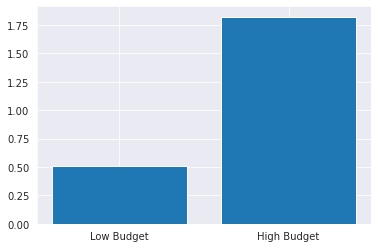

In [67]:
# Plotting the popularity averages of the different budget levels
locations = [1, 2]
heights = [df_low_budget_popularity, df_high_budget_popularity]
labels = ['Low Budget', 'High Budget']
plt.bar(locations, heights, tick_label=labels);

### Which actors starred in most movies over the years?

In [68]:
# def explode(data):
#     data['cast'] = data.cast.str.split('|').explode('cast')
#     data['genres'] = data.genres.str.split('|').explode('genres')
#     data['production_companies'] = data.production_companies.str.split('|').explode('production_companies')
    
    
#     return data

In [79]:
df_actors = df.cast.str.split('|').explode('cast')
df_actors.head()

0            Chris Pratt
1    Bryce Dallas Howard
2            Irrfan Khan
3      Vincent D'Onofrio
4          Nick Robinson
Name: cast, dtype: object

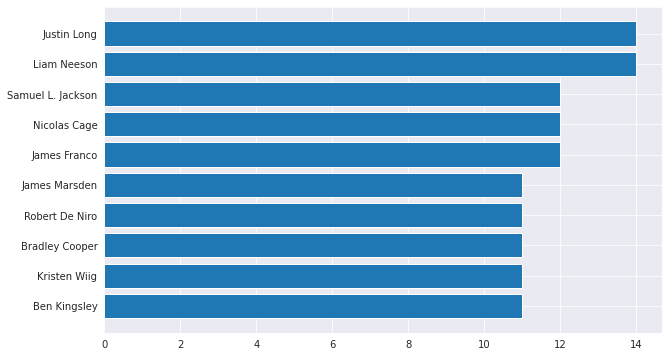

In [81]:
bar(df_actors.value_counts().nlargest(10).sort_values());

### Which directors directed most movies over the years?

In [82]:
df_directors = df.director.str.split('|').explode('director')

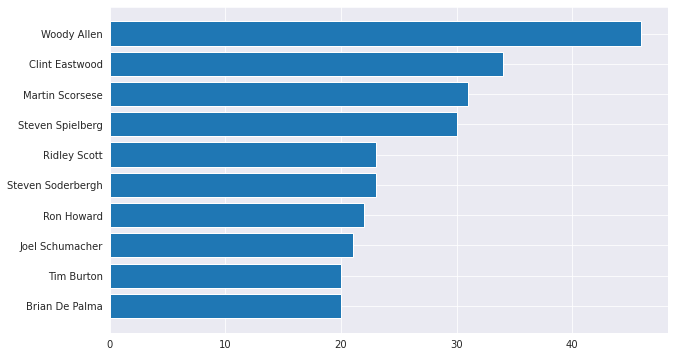

In [86]:
bar(df_directors.value_counts().nlargest(10).sort_values());

### Which production companies produced the most movies over the years?

In [87]:
df_production_companies = df.production_companies.str.split('|').explode('production_companies')

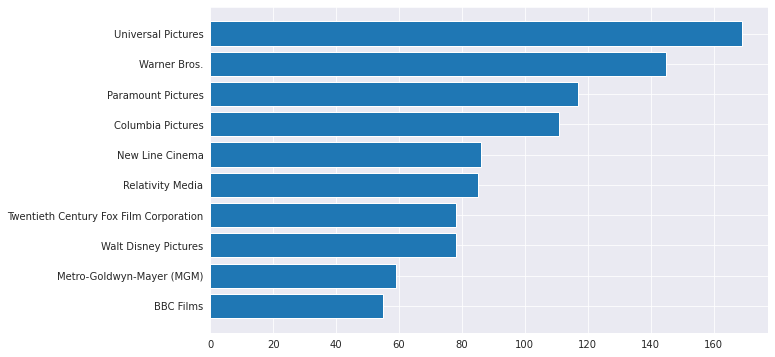

In [89]:
bar(df_production_companies.value_counts().nlargest(10).sort_values())

### Did the number of movies released every year increase or decrease during the years?

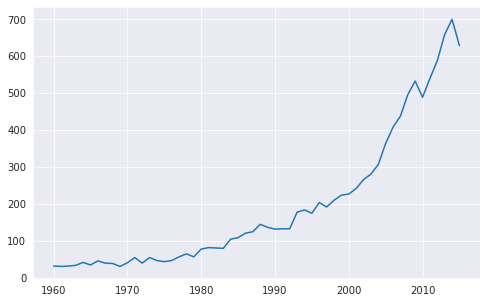

In [91]:
plot(df.groupby('release_year').original_title.count());

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!